# KNN Project

Since KNN is such a simple algorithm, we will just use this project as a simple exercise to test your understanding of the implemetation of KNN. By now, you should feel comfortable implementing a machine learning algorithm in R, as long as you know which library to use.

So for this project, just follow along with the bolded instructions. It should be very simple.

## Get the Data

### The iris Data Set

We'll use the famous iris dataset for this porject. It's a small dataset with flower features that can be used to attempt to predict the species of an iris flower.

__Use the ISLR library to get the iris dataset. Check the head and structure of the Iris dataframe.__

In [2]:
library(ISLR)
head(iris)
str(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


### Standardize the Data
In this case, the iris dataset has all its features in the same order of magnitiude, but it's good practice (especially with KNN) to standardize features in your data. Let's go ahead and do this even though it's not necessary for this data!

__Use scale() to standardize the feature columns of the iris dataset. Set this standardized version of the data as a new variable df__

In [3]:
df <- scale(iris[,1:4])

__Check that the scaling worked by checking the variable of one of the new columns__

In [4]:
var(df[,2])

[1] 1

__Join the standaridized data with the resonse/target/label column (the column with the species name)__

In [5]:
df <- cbind(df,iris[5])

In [6]:
head(df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.8976739,1.01560199,-1.335752,-1.311052,setosa
2,-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
3,-1.3807271,0.32731751,-1.392399,-1.311052,setosa
4,-1.5014904,0.09788935,-1.279104,-1.311052,setosa
5,-1.0184372,1.24503015,-1.335752,-1.311052,setosa
6,-0.5353840,1.93331463,-1.165809,-1.048667,setosa


### Train and Test Splits
__Use the caTools library to split your standardized data into train and test sets. Use a 70/30 split.__

In [8]:
set.seed(101)

library(caTools)

sample <- sample.split(df$Species, SplitRatio = .70)
train <- subset(df, sample == TRUE)
test <- subset(df, sample == FALSE)

### Build a KNN Model
__Call the class library__

In [9]:
library(class)

__Use the KNN function to predict Species of the test set. Use k = 1__

In [10]:
predicted.species <- knn(train[1:4], test[1:4], train$Species, k = 1)

In [11]:
predicted.species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor virginica  versicolor versicolor versicolor
[25] versicolor versicolor virginica  versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

__What was your misclassification rate?__

In [12]:
mean(test$Species != predicted.species)

[1] 0.04444444

Choosing a good K Value

Although our data is too small for us to really get a good feel for choosing a good K value, let's try anyway.

__Create a plot of the error (misclassification) rate for k values ranging from 1 to 10__

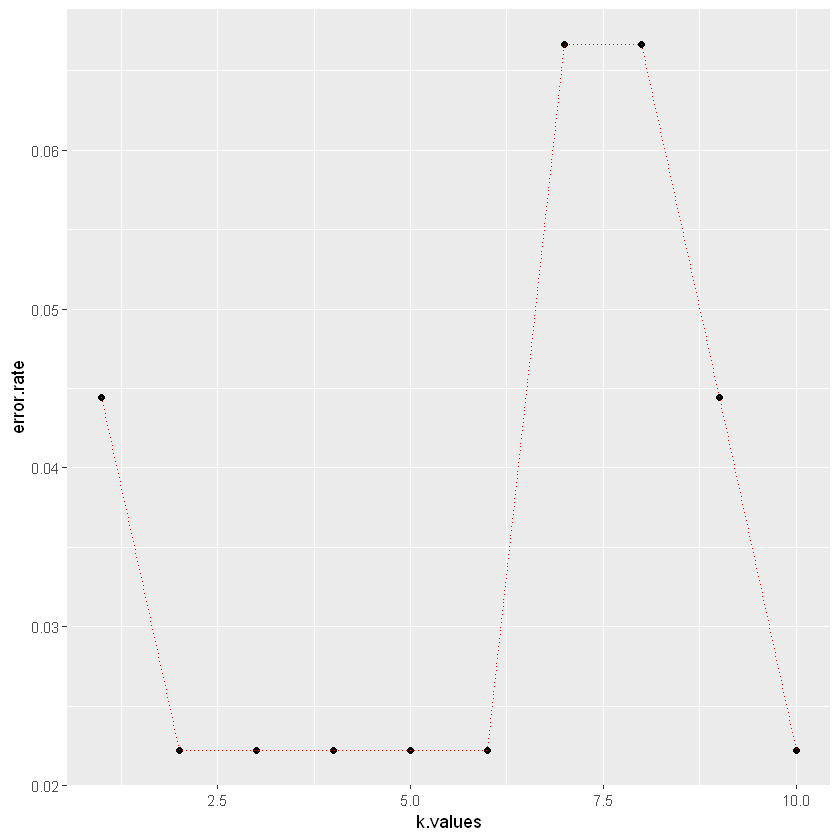

In [21]:
predicted.species <- NULL
error.rate <- NULL

for(i in 1:10){
    set.seed(101)
    predicted.species <- knn(train[1:4],test[1:4],train$Species,k=i)
    error.rate[i] <- mean(test$Species != predicted.species)
}

library(ggplot2)
k.values <- 1:10
error.df <- data.frame(error.rate,k.values)
pl <- ggplot(error.df,aes(x=k.values,y=error.rate)) + geom_point()
pl + geom_line(lty="dotted",color='red')


__You should have noticed that the error drops to its lowest for k values between 2-6. Then it begins to jump back up again, this is due to how small the data set it. At k=10 you begin to approach setting k=10% of the data, which is quite large.__

